### Import required libraries

In [1]:

import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 
from sklearn import model_selection
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

%matplotlib inline

### Increase the size of the screen

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

OptionError: "No such keys(s): 'display.height'"

### Decrypt Credentials and Connect to Database

In [3]:
#Uncode the secret license file
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

### Load the normalized table

In [4]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instances_data', con = conn)
print('--- %s seconds ---' % (time.time() - start_time))
    
df.drop(['index'],axis=1, inplace=True)
df.head(15)

#df.describe()
#print(df.columns)

--- 1.7694392204284668 seconds ---


,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,...,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
0,1520,23,4,97,0,6,10,12,15,17,...,0,0,0,0,0,0,1,0,0,1
1,1611,30,10,98,0,1,8,12,15,17,...,0,1,0,0,0,0,0,0,0,1
2,1118,21,16,94,0,0,3,6,11,12,...,0,1,0,0,0,0,0,0,0,1
3,1669,26,1,99,3,10,12,14,15,17,...,0,0,0,0,0,0,0,0,0,1
4,1619,23,5,97,0,8,13,15,16,18,...,0,0,0,0,0,0,0,0,0,1
5,1472,21,1,93,1,8,10,12,14,16,...,0,0,0,0,0,0,0,0,0,1
6,1379,19,1,93,1,7,11,13,14,15,...,0,0,0,0,0,0,0,0,0,1
7,1850,25,1,98,7,11,13,17,18,20,...,0,1,0,0,0,0,0,0,0,1
8,1796,24,1,96,4,9,13,17,19,19,...,0,1,0,0,0,0,0,0,0,1
9,1302,21,1,98,1,6,9,10,12,13,...,0,1,0,0,0,0,0,0,0,1


### Visualize only important features 

In [5]:
#songs = df[['decade', 'duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
#            'words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre','words_genre_r','words_second',\
#            'speed_general', 'artist_familiarity', 'artist_hotttnesss', \
#            'gnr_Metal','is_top40']]
songs = df [['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'words_song_u', 'words_song', \
             'words_song_r', 'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 'speed_general', \
             'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', 'gnr_Funk', \
             'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', \
             'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', \
             'gnr_Ska Reggae Dancehall', 'is_top40']]

### Correlation Matrix Plot

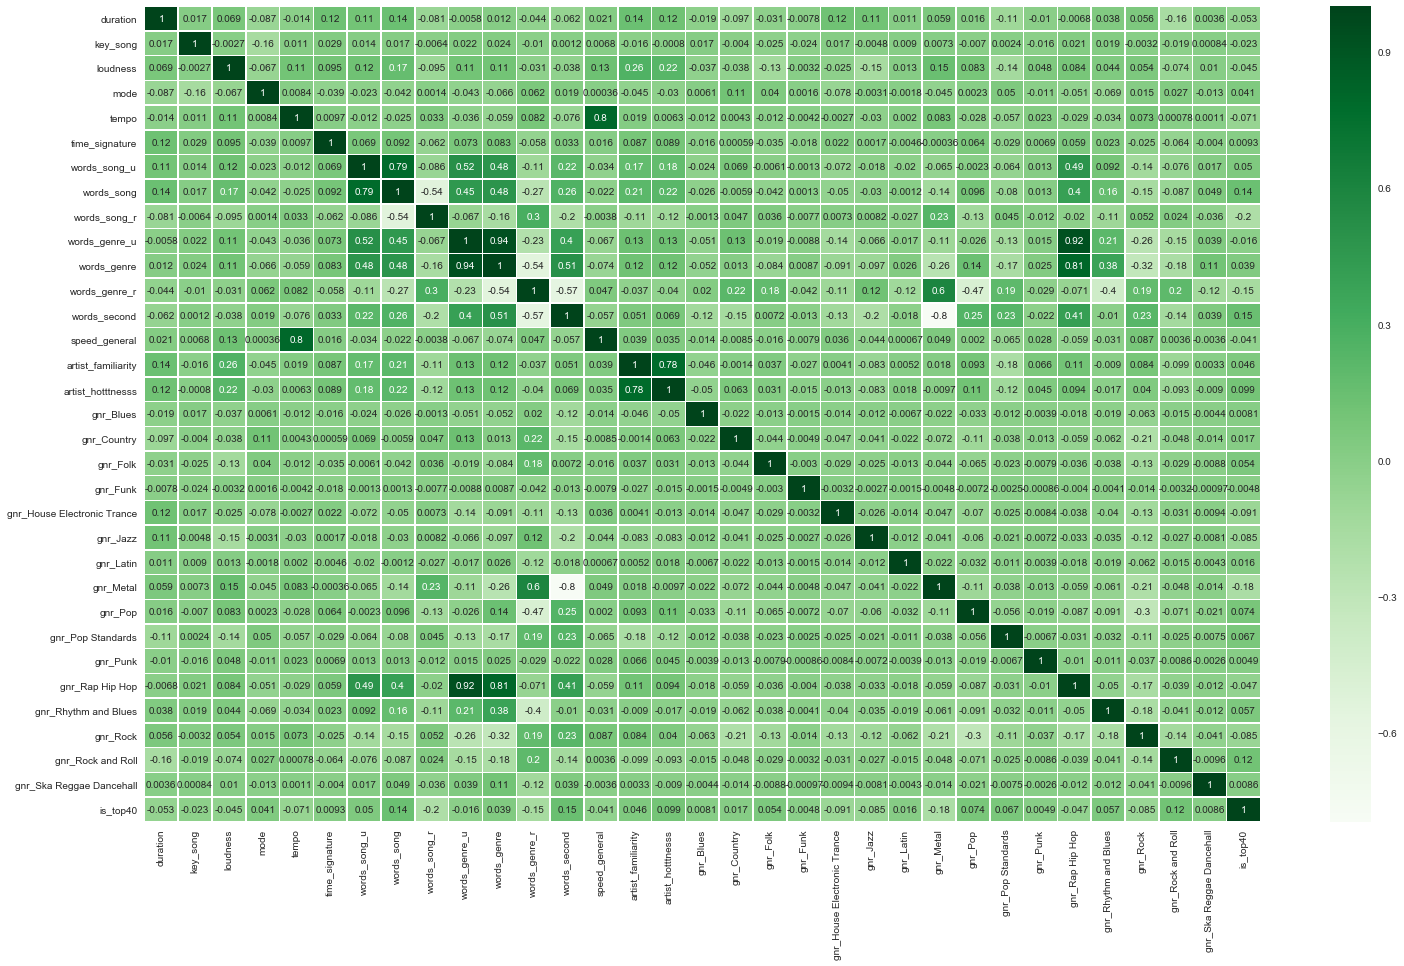

In [6]:
import seaborn as sns
corr = songs.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, cmap="Greens")
plt.show()

### Scatterplot

/anaconda3/envs/MusicMood/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


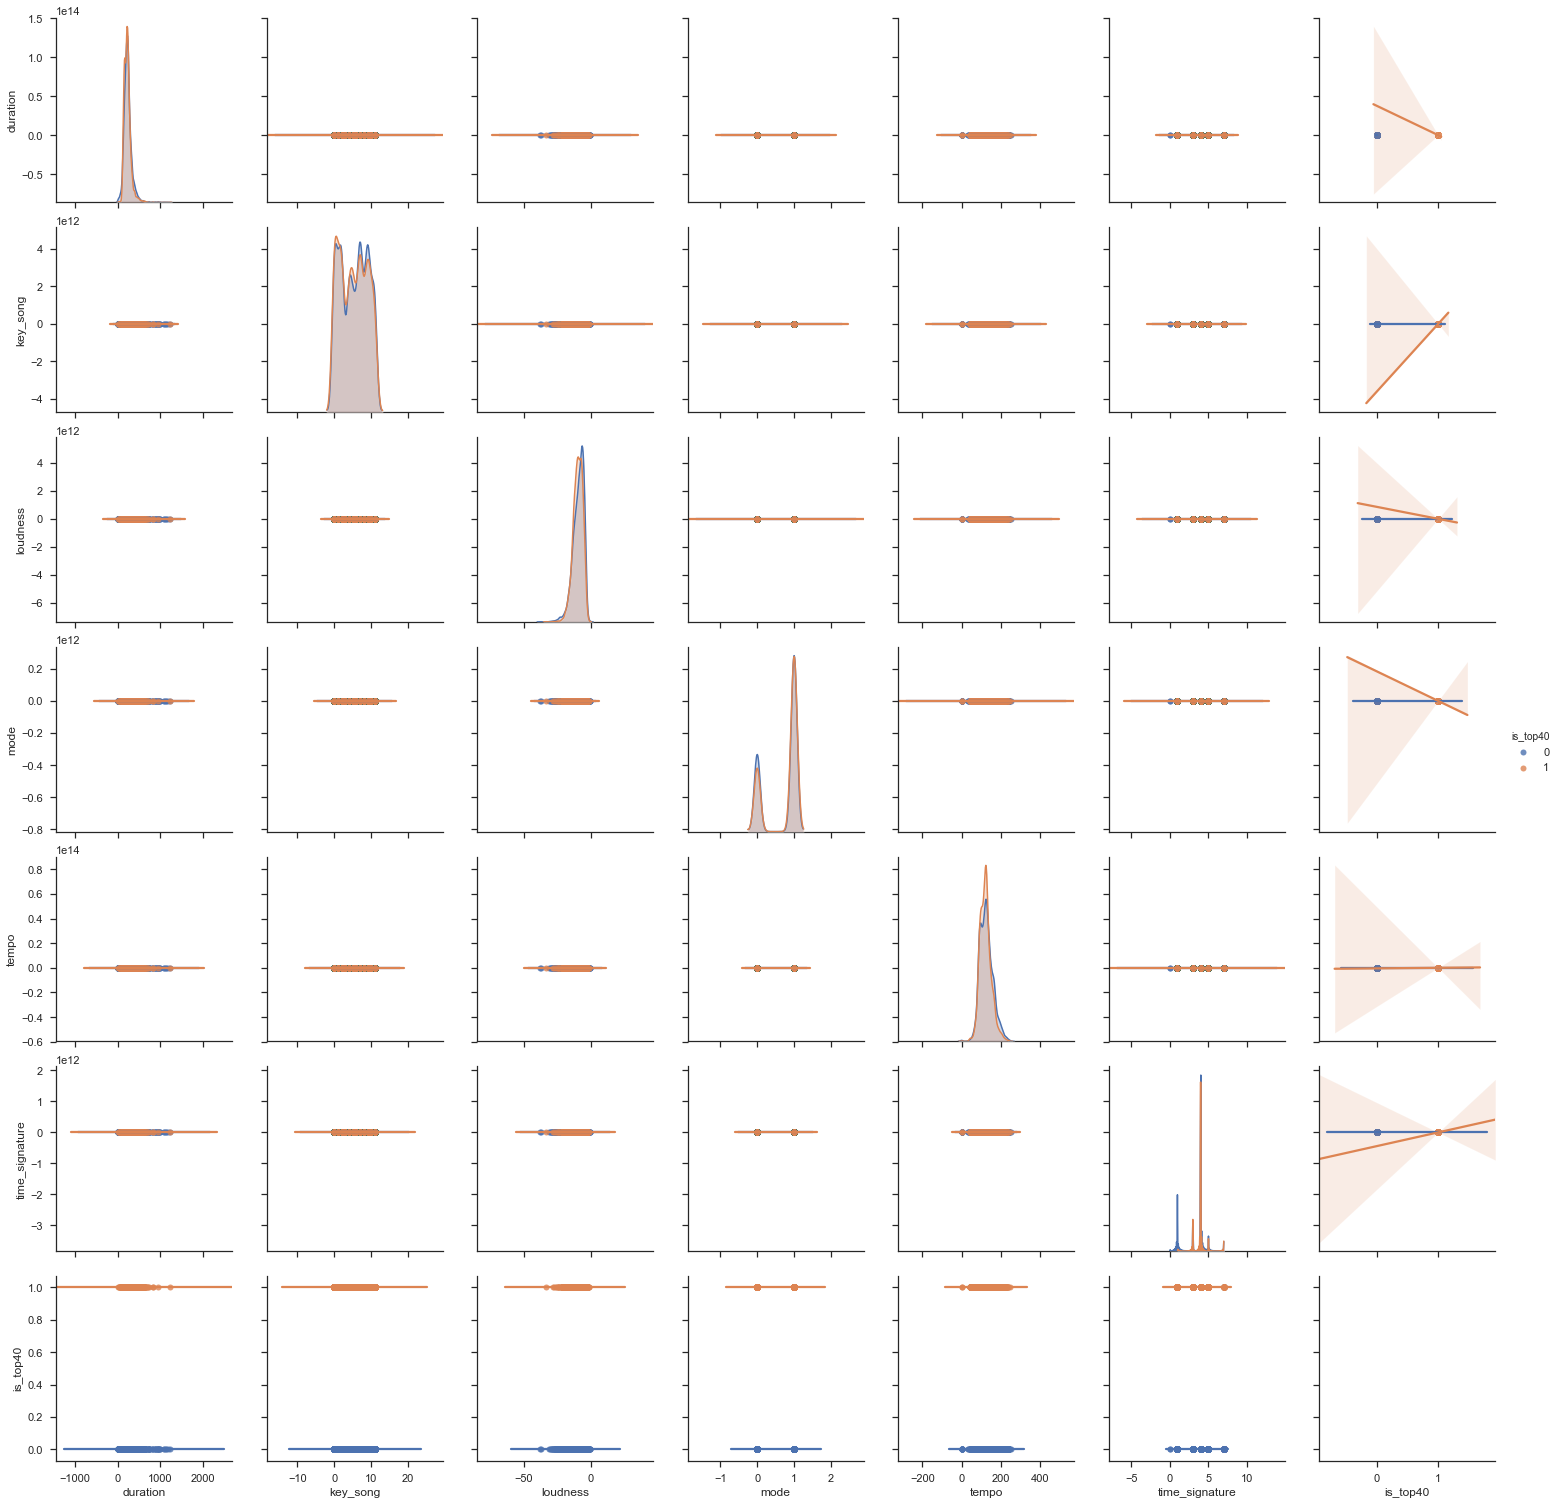

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
g = sns.pairplot(songs, size=3, hue='is_top40', vars=['duration', 'key_song', 'loudness', 'mode', 'tempo', \
                                      'time_signature','is_top40'], kind="reg")

/anaconda3/envs/MusicMood/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


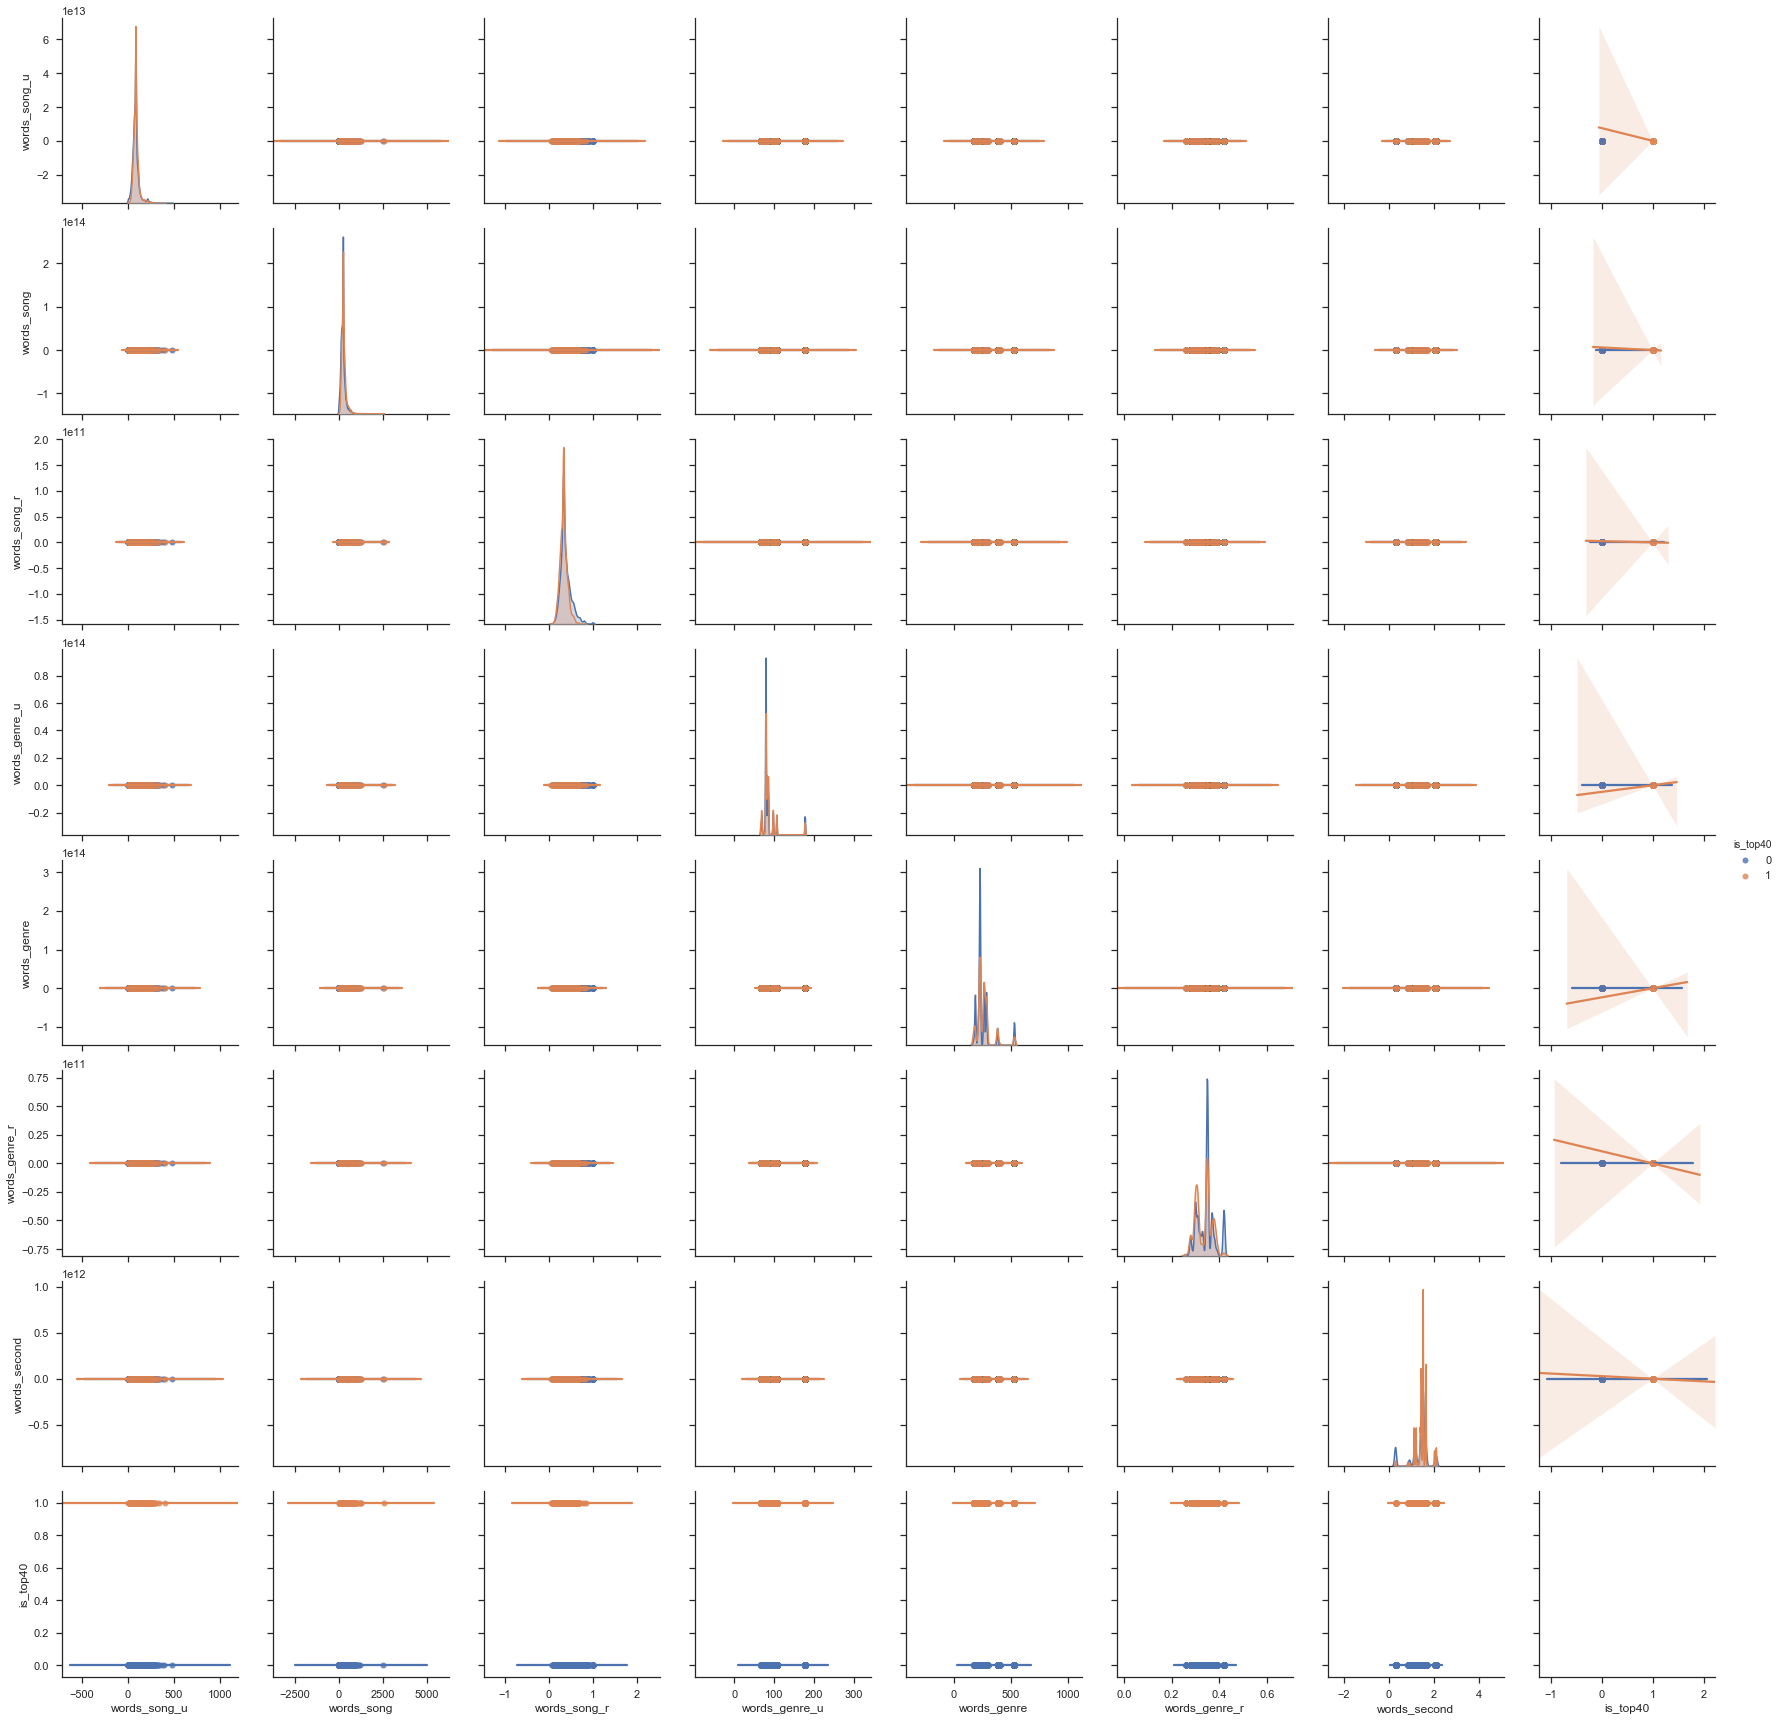

In [8]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
g = sns.pairplot(songs, size=3, hue='is_top40', vars=['words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre',\
                                      'words_genre_r','words_second','is_top40'], kind="reg")

/anaconda3/envs/MusicMood/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


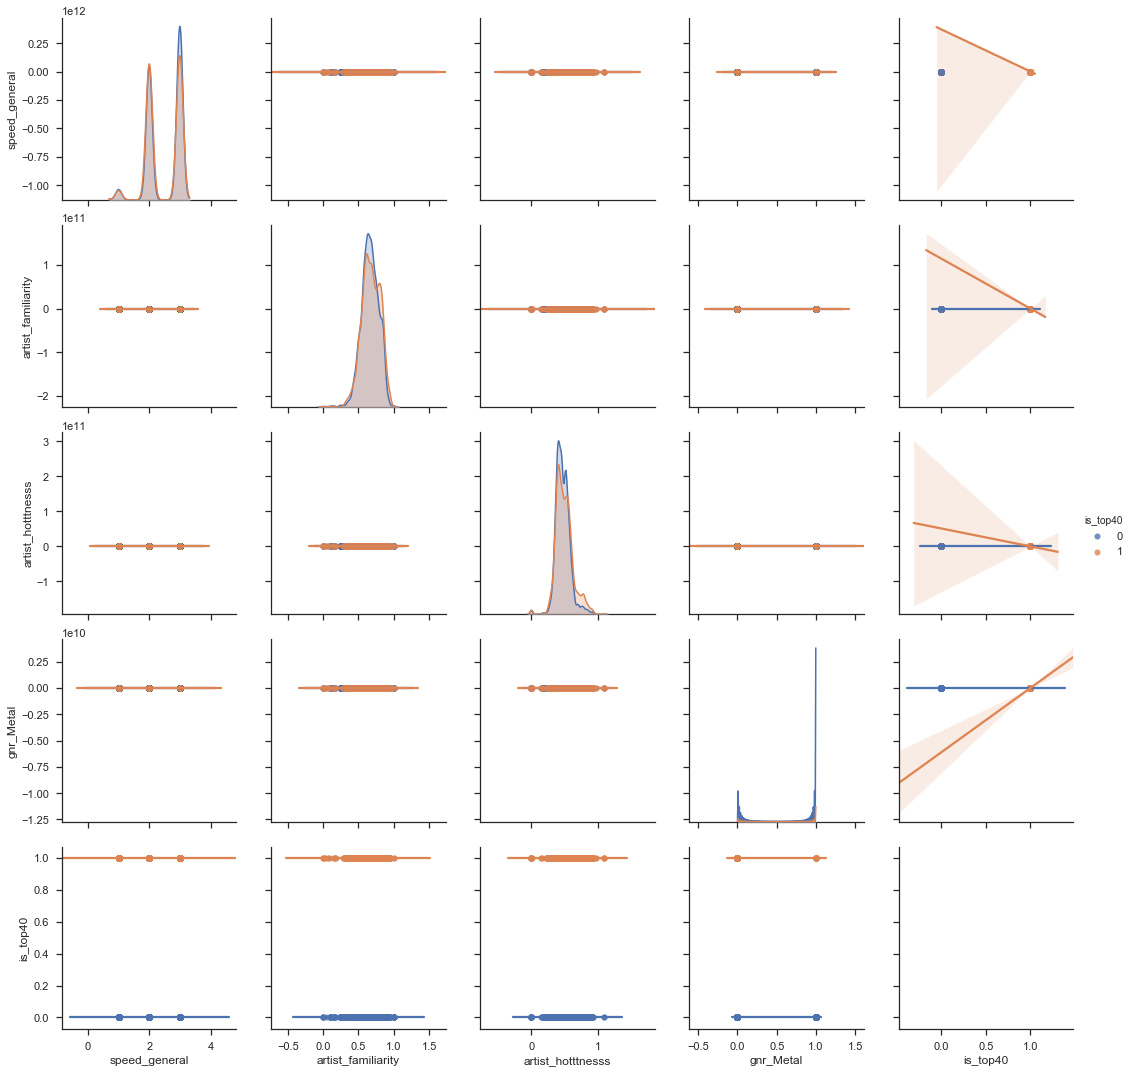

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
g = sns.pairplot(songs,hue='is_top40', size=3, vars=['speed_general', 'artist_familiarity', 'artist_hotttnesss', \
            'gnr_Metal','is_top40'], kind="reg")

### Scatter Matrix

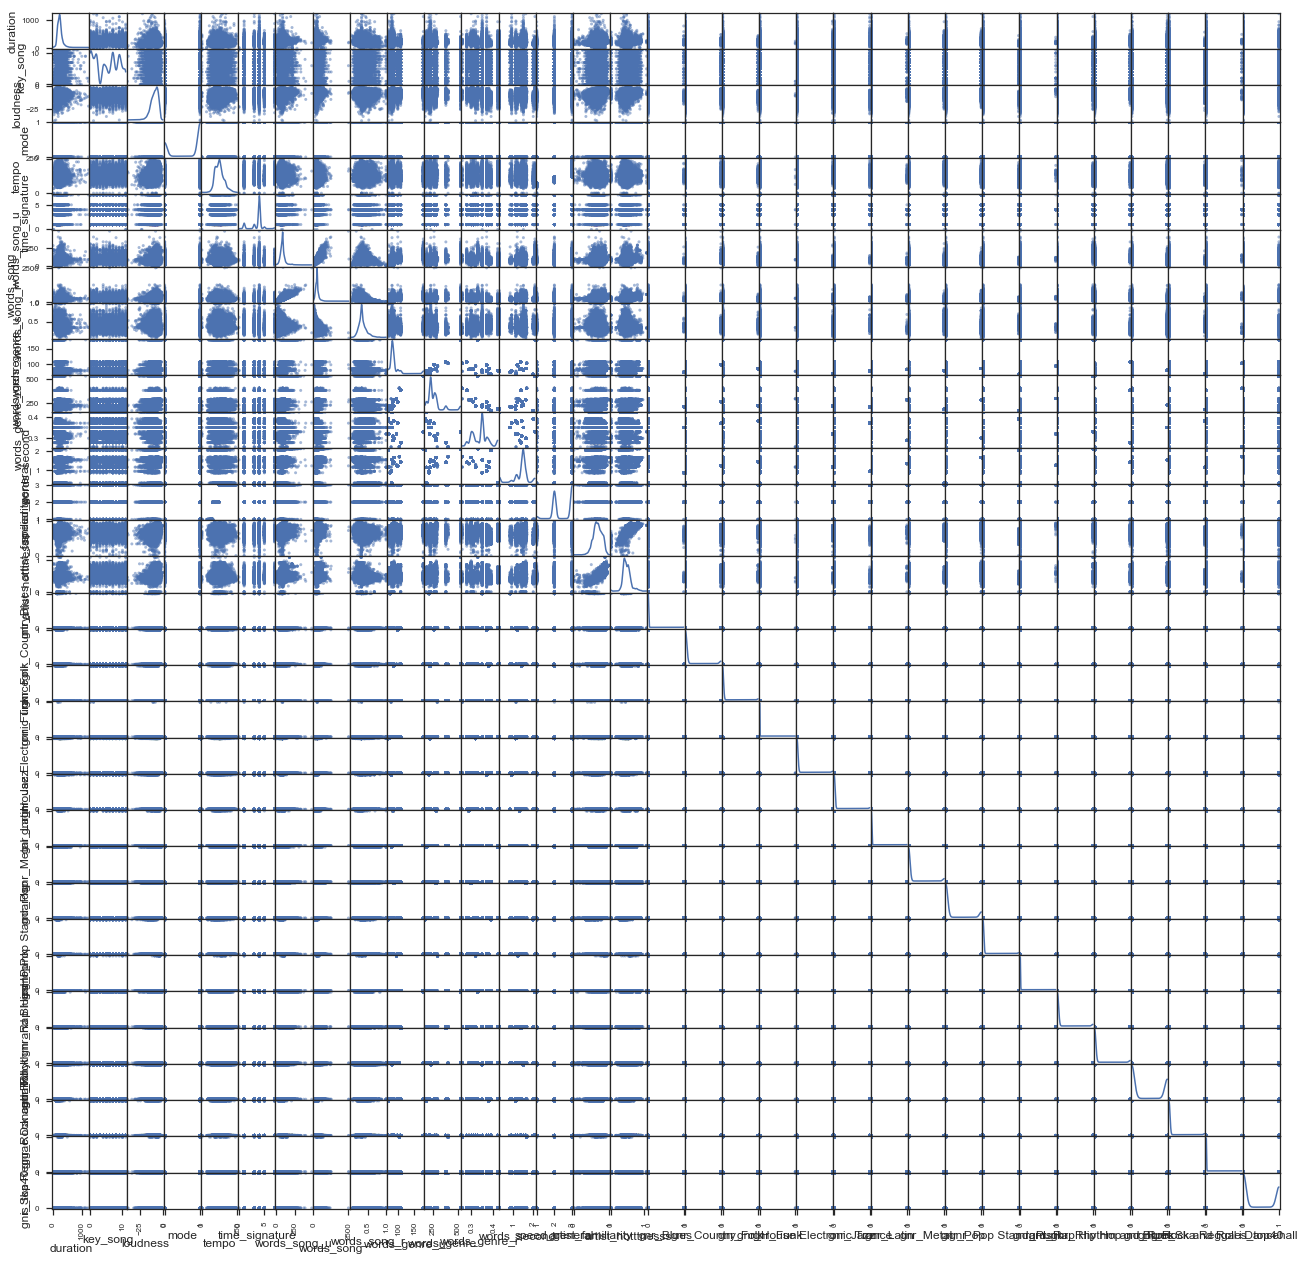

In [10]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(songs, alpha=0.5, figsize=(22, 22), diagonal='kde')
plt.show()

### Kernel Density Estimation Plots

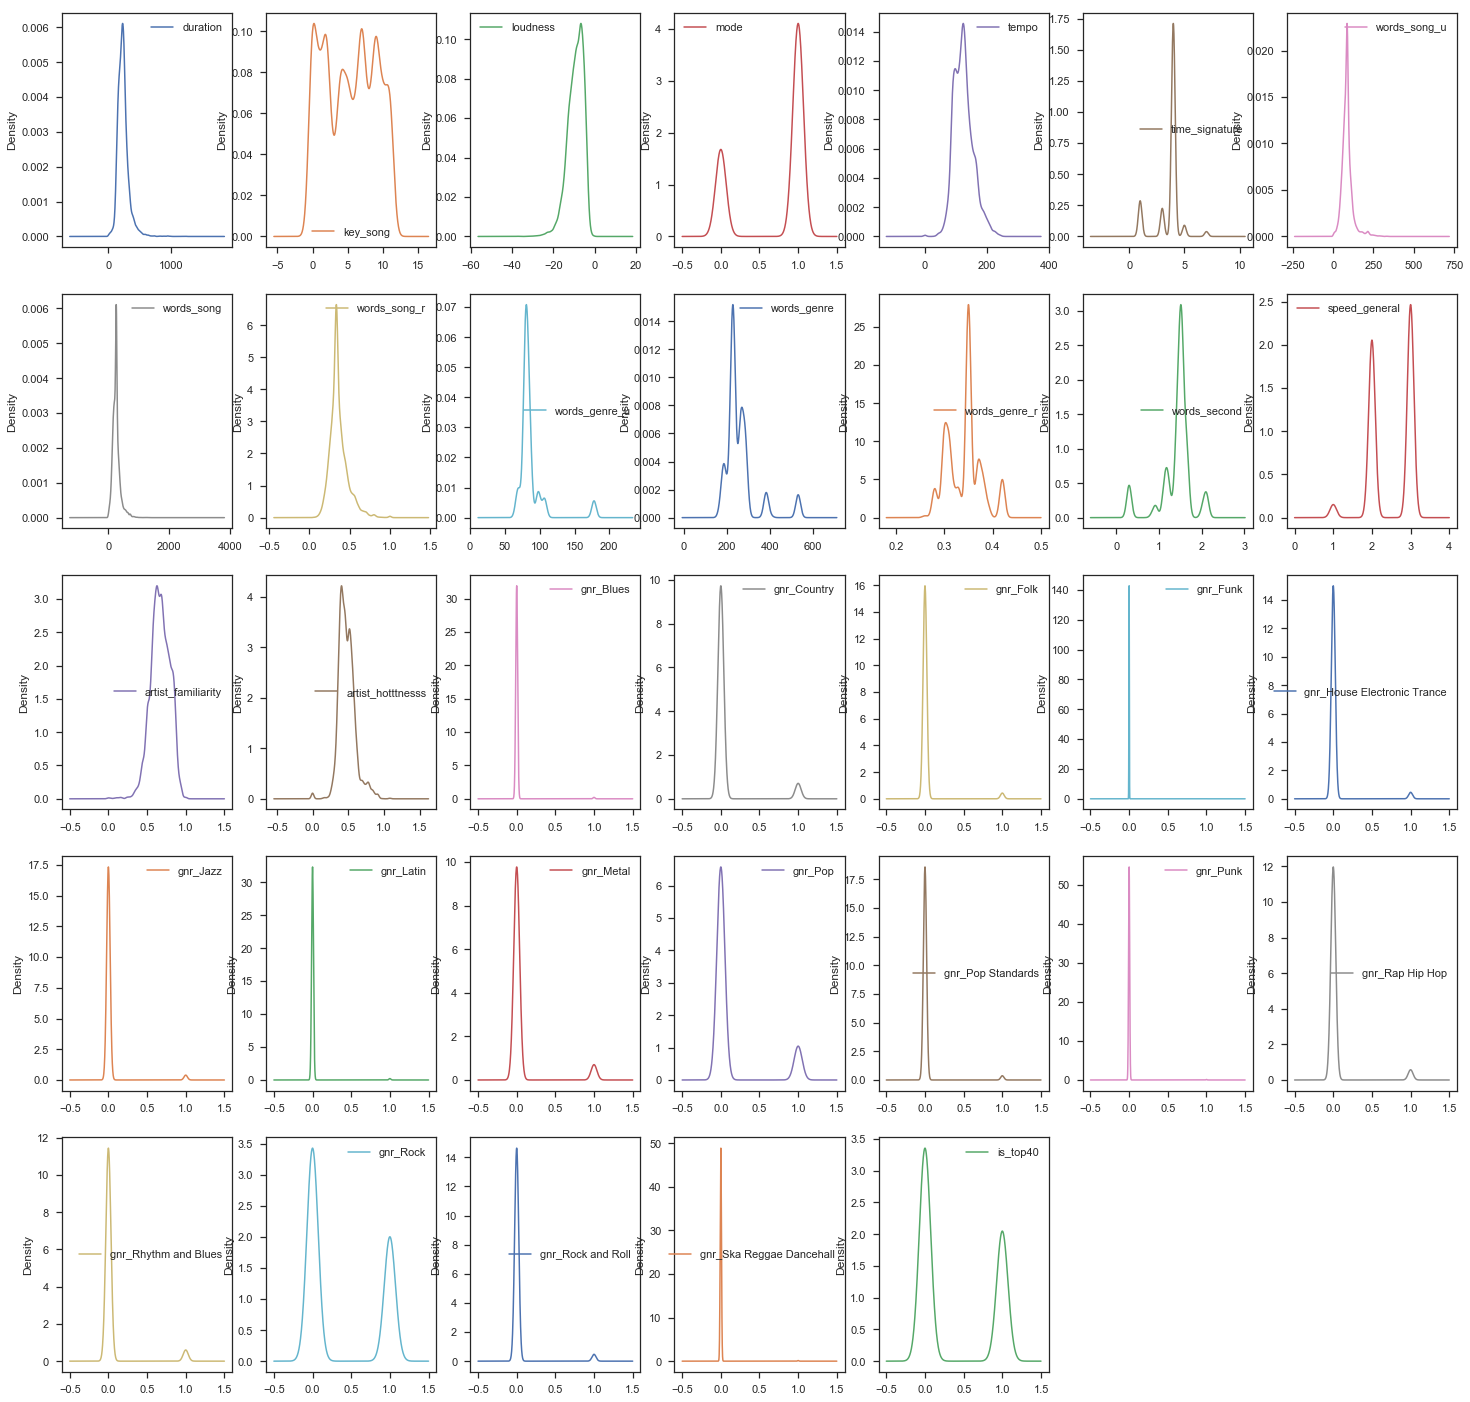

In [11]:
songs.plot(kind='kde', subplots=True, layout=(5,7), sharex=False, sharey=False, figsize=(25,25))
plt.show()

### Box Plots 

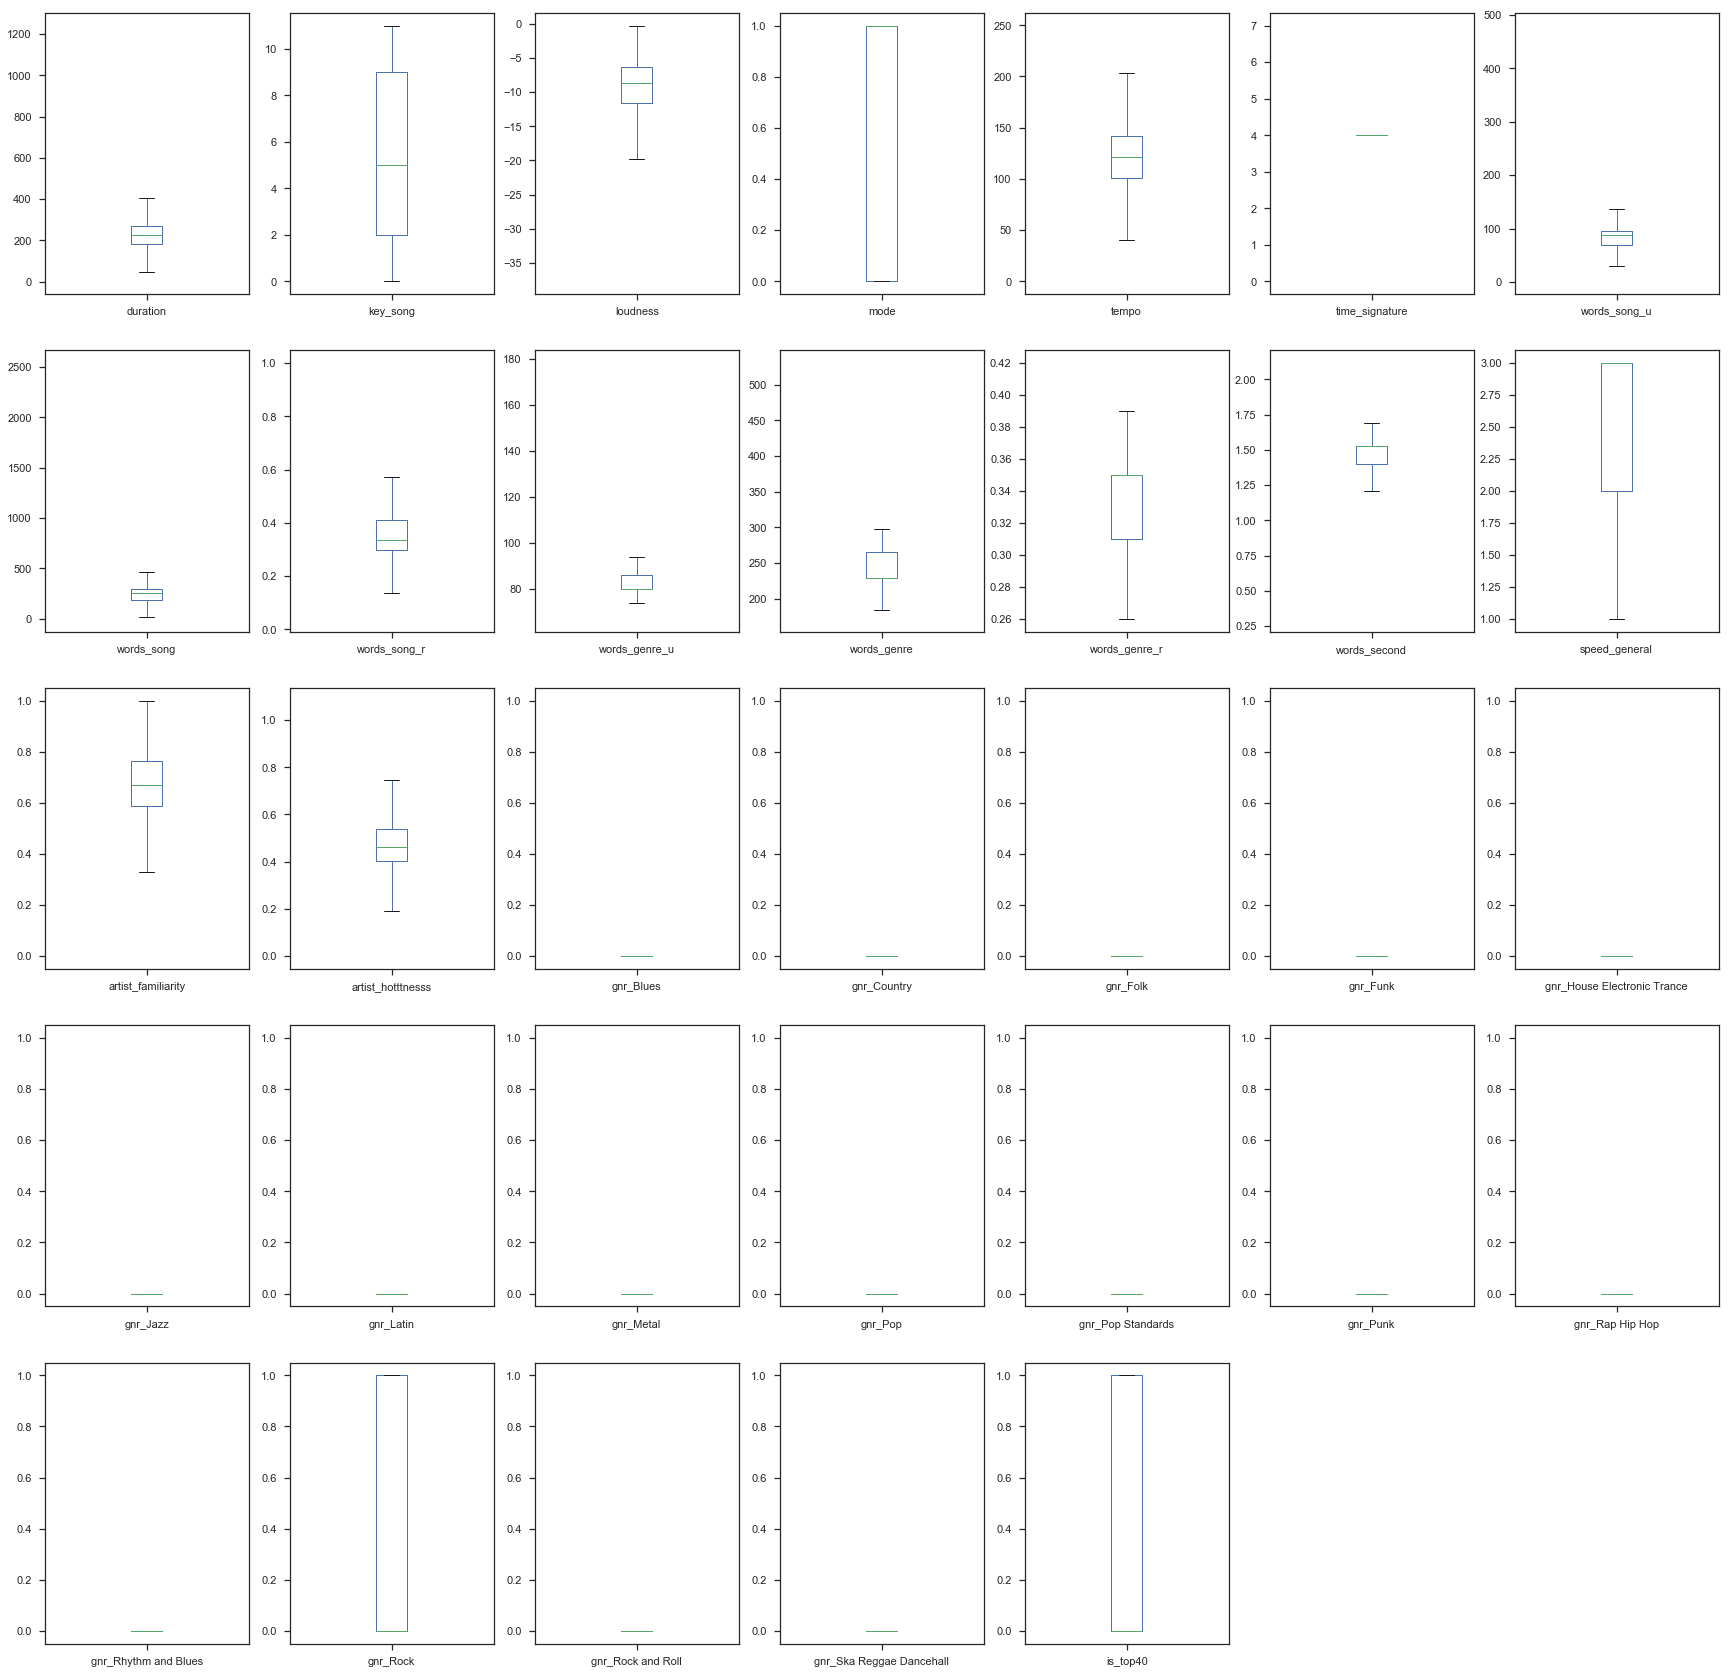

In [12]:
songs.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False, figsize=(30,30))
plt.show()

### Parallel Coordinates

/anaconda3/envs/MusicMood/lib/python3.6/site-packages/yellowbrick/features/pcoords.py:344: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/yellowbrick/features/pcoords.py:346: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


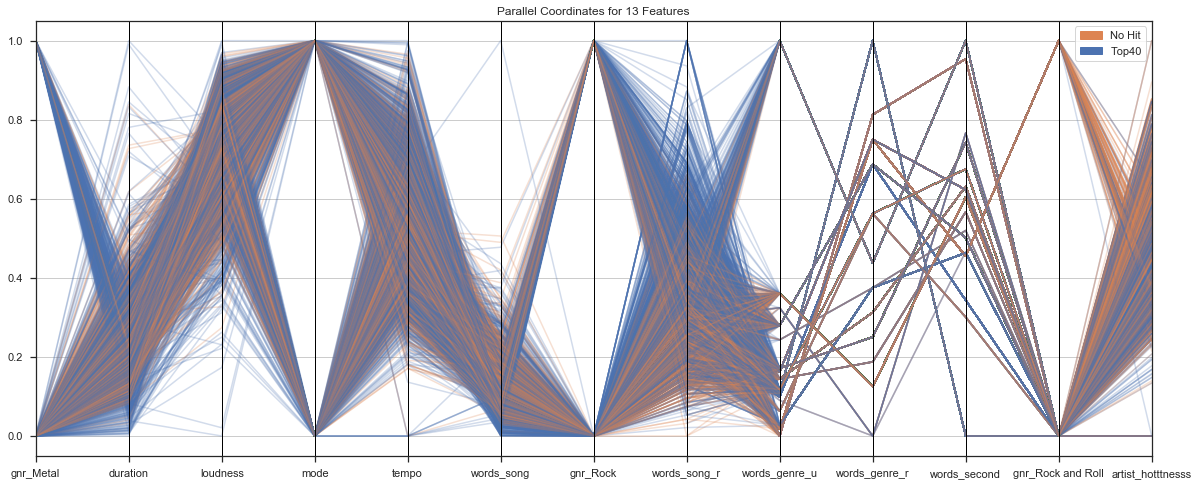

In [13]:
#from pandas.plotting import parallel_coordinates
#plt.figure(figsize=(20,5))
#dataset = df[['loudness','mode','duration','time_signature','tempo','key_song','is_top40']]
#parallel_coordinates(songs, 'is_top40',color=['r','b'], alpha=0.45)
#plt.show()
#songs.columns
from yellowbrick.features import ParallelCoordinates
# features = ['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'words_song_u', \
#             'words_song', 'words_song_r', 'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 
#             'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Metal']
classes = ["Top40", "No Hit"]

features = [ 'gnr_Metal','duration', 'loudness', 'mode', 'tempo', 'words_song','gnr_Rock', 'words_song_r', 'words_genre_u', 'words_genre_r',\
            'words_second',  'gnr_Rock and Roll', 'artist_hotttnesss']
X = songs[features]
y = songs.is_top40
_, ax = plt.subplots(figsize=(20,8))
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, normalize='minmax',sample=0.5, shuffle=True
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.poof()

### Rad Viz

/anaconda3/envs/MusicMood/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/envs/MusicMood/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


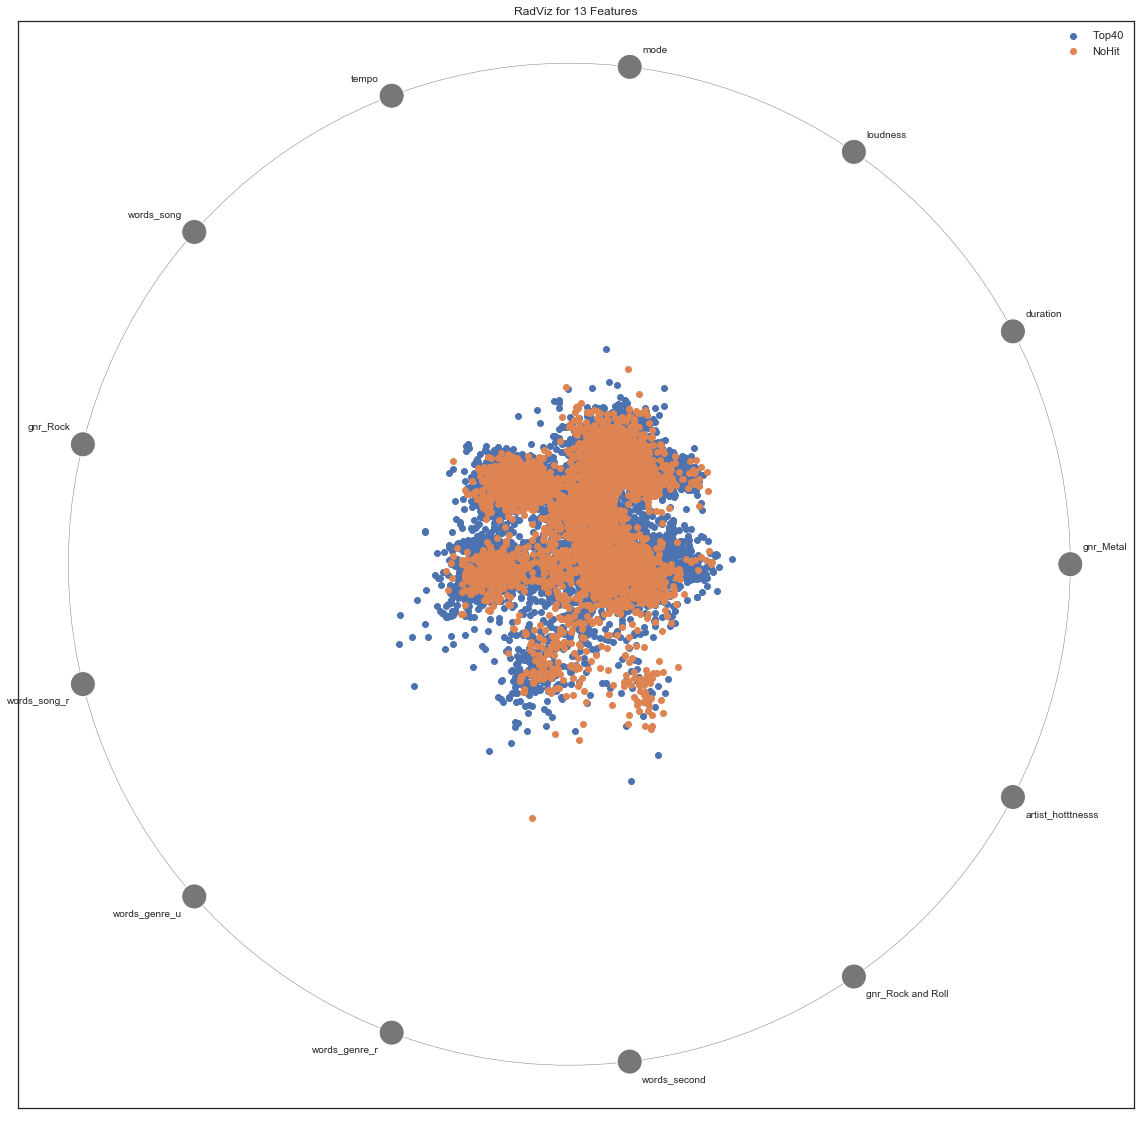

In [14]:
# Specify the features of interest and the classes of the target
classes = ["Top40", "NoHit"]
# Extract the numpy arrays from the data frame
X = songs[features].as_matrix()
y = songs.is_top40.as_matrix()
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
_,ax = plt.subplots(figsize=(20,20))
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

# Initial Model Comparison

### Split-Out validation dataset

In [15]:
array = songs.values
X = array[:,0:-1]
Y = array[:,-1] #is_top40
    
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

  ### Test options and evaluation metric

In [16]:
seed = 7
# scoring = 'accuracy'
scoring = 'accuracy'

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import AdaBoostClassifier

### Selected Algorithms

In [18]:
models = []
# #Classification Models
# #Naive Bayes
# models.append(('NB', GaussianNB(priors=None)))
# models.append(('BNB', BernoulliNB(alpha=1.0)))
# #Decision Tree
# models.append(('CART',DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth = 10)))
# models.append(('RFC', RandomForestClassifier(n_estimators=10,max_depth=10)))
# #Discriminant Analysis
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('QDA', QuadraticDiscriminantAnalysis()))

# #LogisticRegression
# models.append(('LRG', LogisticRegression()))
# models.append(('LCV', LogisticRegressionCV()))

# #KNN
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('NCT', NearestCentroid()))
# #models.append(('KNN', NearestNeighbors()))
# models.append(('RNC', RadiusNeighborsClassifier(radius=5.0, outlier_label=1)))
# #Support Vector Machine
# models.append(('SVM', SVC())) 
# models.append(('NuSVM', NuSVC())) 
# #kernel="linear", C=0.025)))
# models.append(('LinearSVC', LinearSVC())) #kernel="linear", C=0.025)))
              
# models.append(('ABC',AdaBoostClassifier()))


KNeighborsClassifier().get_params(deep = True)
n_neighbors = np.linspace(1,12,num=12, endpoint=True)
for a in range(len(n_neighbors)):
    models.append(('KNC'+ str(int(n_neighbors[a])), KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_jobs= -1, n_neighbors= int(n_neighbors[a]))))
                                                          

# import numpy as np
# from yellowbrick.model_selection import ValidationCurve

# pr = np.linspace(1, 5, num=5, endpoint=True)
# print(np.linspace(1, 5, num=5, endpoint=True))
# model = ValidationCurve(KNeighborsClassifier(), param_name="n_neighbors", param_range=pr)
# model.fit(X_train, Y_train)
# model.poof()


### Initial Evaluation Each Model in Turn

In [19]:
results = []
names = []

for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=12, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)'% (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('--- %s seconds ---' % (time.time() - start_time))

KNC1: 0.600163 (0.015018)
--- 1.4894919395446777 seconds ---
KNC2: 0.616891 (0.022619)
--- 1.4623632431030273 seconds ---
KNC3: 0.614851 (0.019509)
--- 1.4478309154510498 seconds ---
KNC4: 0.627295 (0.018773)
--- 1.4468307495117188 seconds ---
KNC5: 0.620155 (0.013578)
--- 1.4434101581573486 seconds ---
KNC6: 0.628825 (0.013948)
--- 1.4474778175354004 seconds ---
KNC7: 0.628315 (0.014742)
--- 1.4397010803222656 seconds ---
KNC8: 0.636067 (0.012325)
--- 1.4550468921661377 seconds ---
KNC9: 0.631477 (0.013328)
--- 1.435920000076294 seconds ---
KNC10: 0.632395 (0.014818)
--- 1.4508559703826904 seconds ---
KNC11: 0.637087 (0.016816)
--- 1.4434819221496582 seconds ---
KNC12: 0.638209 (0.016890)
--- 1.4482698440551758 seconds ---


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_jobs= -1, n_neighbors= int(n_neighbors[a]))
KNeighborsClassifier().get_params(deep = True)
tuned_parameters = [{
                        'algorithm': ['ball_tree'], 
                        'leaf_size': [20, 30, 40], 
                        'metric': ['minkowski'],
                        'p': [2],
                        'n_neighbors': [3, 5, 7],
                        'weights': ['uniform']
                    },
                     {
                        'algorithm': ['kd_tree'], 
                        'leaf_size': [20, 30, 40], 
                        'metric': ['minkowski'],
                        'p': [2],
                        'n_neighbors': [3, 5, 7],
                        'weights': ['uniform']
                     },
                     {
                        'algorithm': ['brute'], 
                        'leaf_size': [20, 30, 40], 
                        'metric': ['minkowski'],
                        'p': [2],
                        'n_neighbors': [3, 5, 7],
                        'weights': ['uniform']
                     }
                    ]

#scores = ['precision', 'recall']
scores = ['accuracy']

for score in scores:
    print("Hyper-parameters (Tunning) for %s" % score)
    print()
    start_time = time.time()
    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, Y_train)

    print()
    print("--- Results ---")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_validation, clf.predict(X_validation)
    print(classification_report(y_true, y_pred))
    print()
    print('--- %s seconds ---' % (time.time() - start_time))


Hyper-parameters (Tunning) for accuracy


--- Results ---

{'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Grid scores:

0.615 (+/-0.019) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.620 (+/-0.018) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.631 (+/-0.019) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.615 (+/-0.019) for {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.620 (+/-0.018) for {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.631 (+/-0.019) for {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'unifo

### Compare Algorithms

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Applying the Visualization to the Models

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes = ["IsTop40", "NoHit"]
def plotting(name, model):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, Y_train)  # Fit the visualizer and the model
    visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
    g = visualizer.poof()             # Draw/show/poof the data
    
for name, model in models:
    plotting(name, model)

In [ ]:
from sklearn.linear_model import Lasso
from yellowbrick.classifier import ClassPredictionError

def vizerror(name, model):
    # Instantiate the visualizer
    visualizer = ClassPredictionError(
        model, classes=classes)
    # Fit
    visualizer.fit(X_train, Y_train)
    # Score and visualize
    visualizer.score(X_validation, Y_validation)
    visualizer.poof()
    
for name, model in models:
    vizerror(name, model)